<a href="https://colab.research.google.com/github/wlopezm-unal/Machine-learning/blob/main/Preparatorio_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LImpieza de datos y modelo básico de Machine learning

En este colab se desea proceder con la limpieza de datos y posterior a un primer análisis de machine learning para determinar qué tipo de empleados son más probables en abandonar la compañia observando que variables pueden influir para determinar que puede influir en el abandono de la empresa

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/AbandonoEmpleados.csv', sep=';', index_col='id', na_values='#N/D')
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


In [ ]:
#We be able to know if there one or more null data
df.isnull().sum().sort_values(ascending=False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

In [ ]:
#eliminar estas columnas ya que superan el 60% de nan
df.drop(columns=['anos_en_puesto','conciliacion'], inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

sexo                        199
educacion                   101
satisfaccion_trabajo         76
implicacion                  18
edad                          0
mayor_edad                    0
anos_desde_ult_promocion      0
anos_compania                 0
num_formaciones_ult_ano       0
anos_experiencia              0
nivel_acciones                0
horas_quincena                0
satisfaccion_companeros       0
evaluacion                    0
incremento_salario_porc       0
horas_extra                   0
estado_civil                  0
num_empresas_anteriores       0
salario_mes                   0
abandono                      0
puesto                        0
nivel_laboral                 0
satisfaccion_entorno          0
empleados                     0
carrera                       0
distancia_casa                0
departamento                  0
viajes                        0
anos_con_manager_actual       0
dtype: int64

In [ ]:
#cambiar los valores categoricas por numericas
def graficos_eda_categoria(cat):
  #calcular el número de filas
  from math import ceil

  #las filas análiza las variables categoricas
  filas=ceil(cat.shape[1]/2)

  #Definir el grafico
  f, ax=plt.subplot(nrows=filas, ncols=2, figsize=(16, filas*16))

  #aplanar el grafico
  ax=ax.flat

  #crear bucle

  for cada, variable in enumerate(cat):
    cat[variable].value_counts().plotbarh(ax=ax[cada])
    ax[cada].set_title(variable, fontsize=12, fontweight='bold')
    ax[cada].tick_params(labelsize=12)

In [ ]:
import math
import matplotlib.pyplot as plt

def graficos_eda_categoria(cat):
    # Calcular el número de filas
    filas = math.ceil(cat.shape[1] / 2)

    # Definir el gráfico
    fig, ax = plt.subplots(nrows=filas, ncols=2, figsize=(16, filas * 8))

    # Aplanar el gráfico
    ax = ax.flatten()

    # Crear bucle
    for i, variable in enumerate(cat.columns):
        cat[variable].value_counts().plot.barh(ax=ax[i])
        ax[i].set_title(variable, fontsize=12, fontweight='bold')
        ax[i].tick_params(labelsize=12)

    # Ajustar el espaciado entre subplots
    plt.tight_layout()

# Ejemplo de uso
# Suponiendo que 'cat' es un DataFrame con variables categóricas



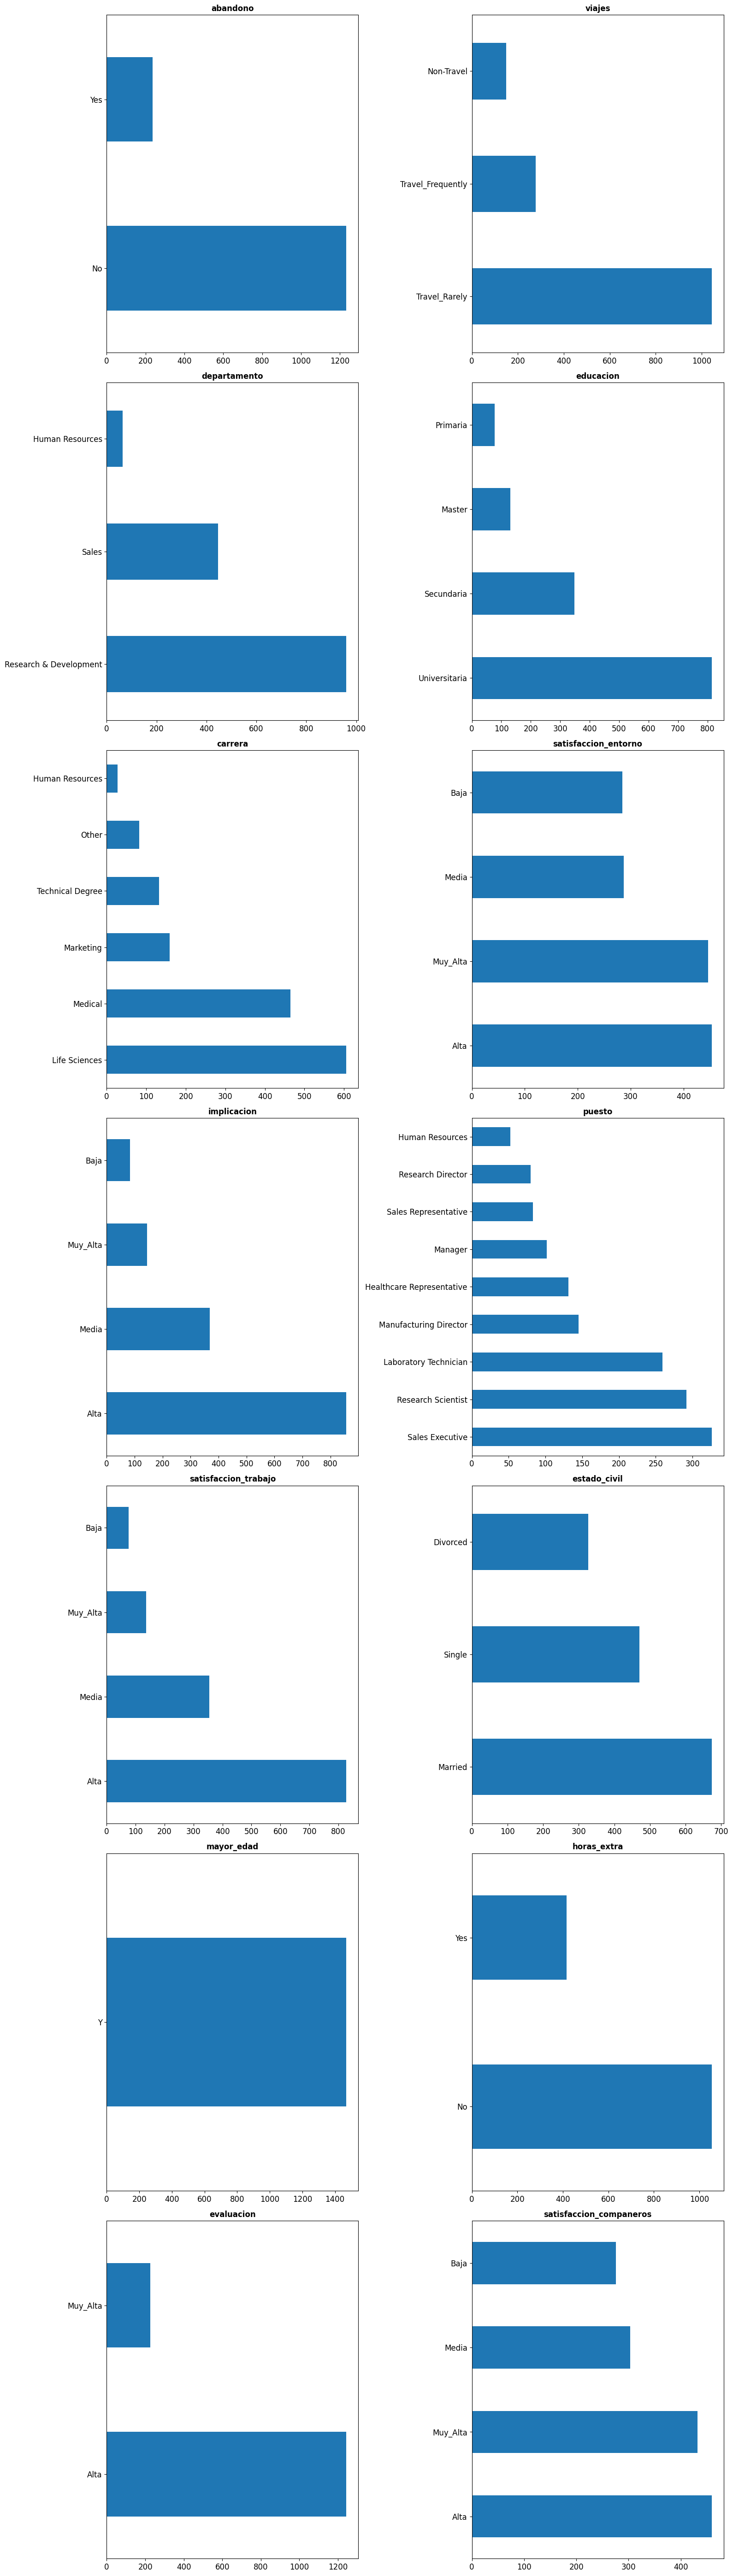

In [ ]:
graficos_eda_categoria(df.select_dtypes('O'))

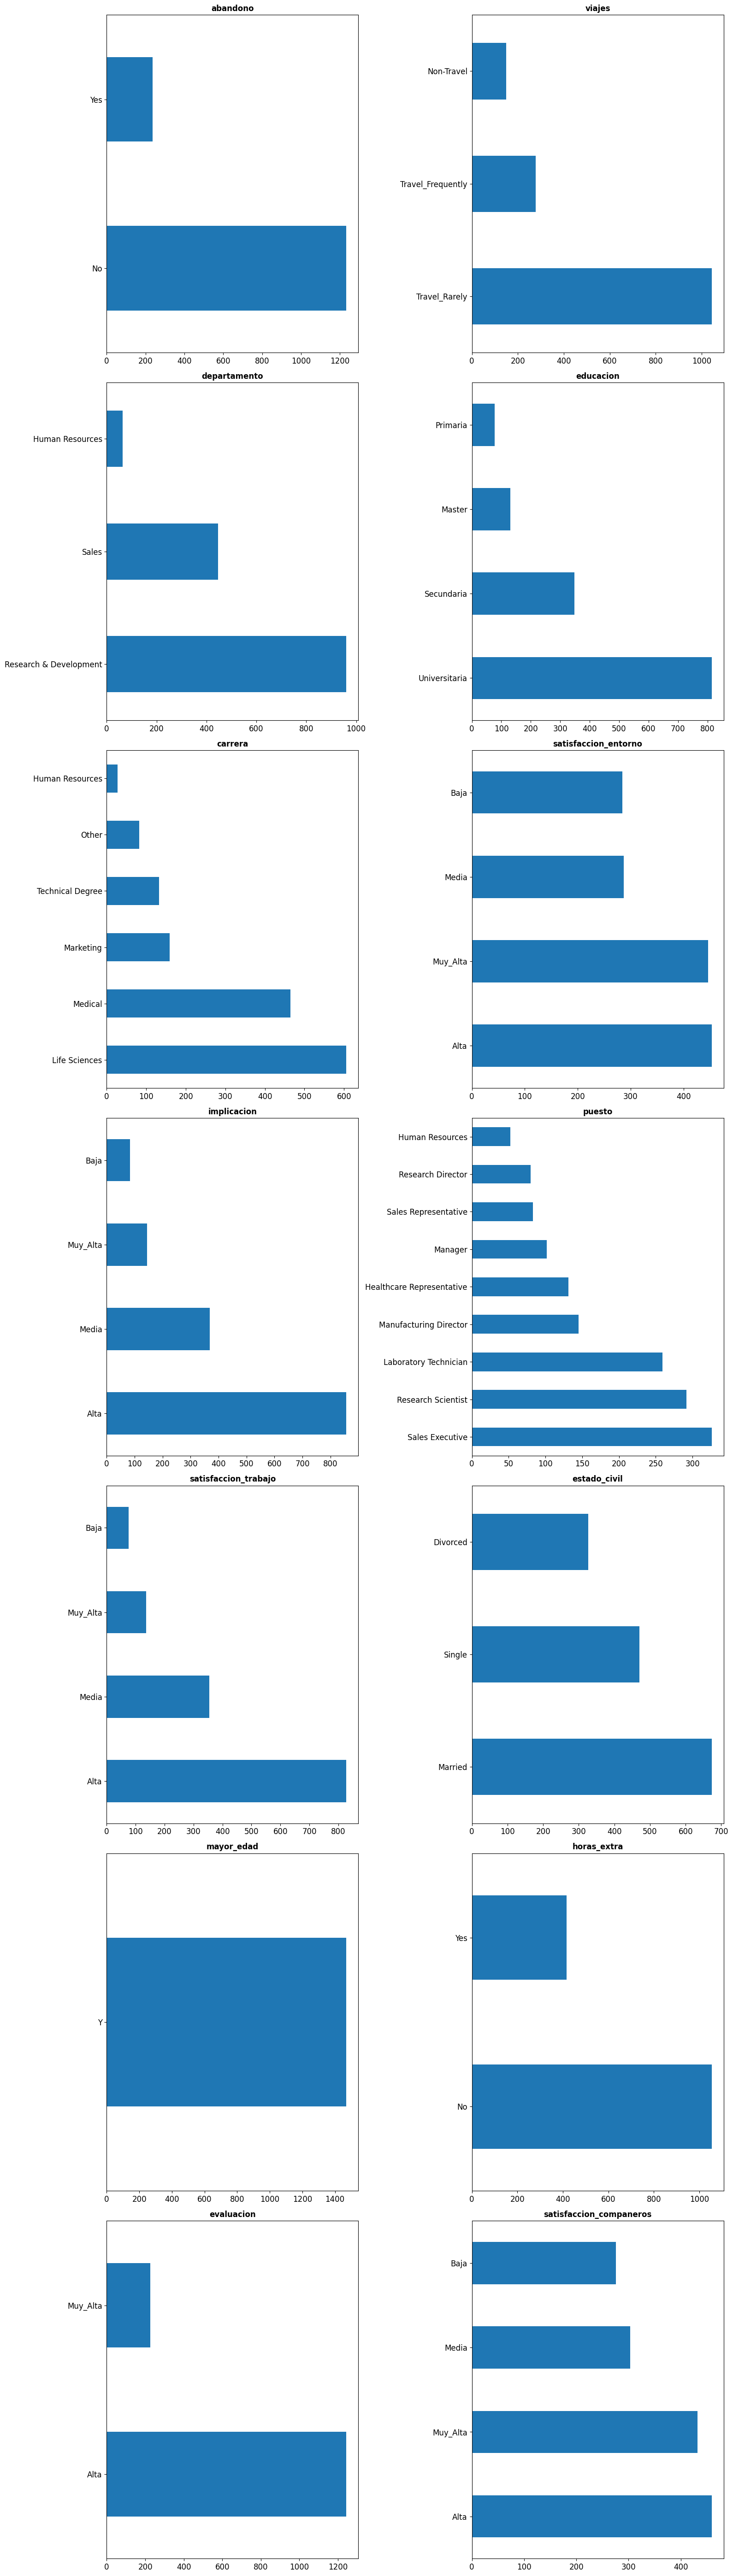

In [ ]:
graficos_eda_categoria(df.select_dtypes('O'))

In [ ]:
#mayor de edad solo tiene un valor
#educación: imputar por universitarios,
#satisfacción_trabajo: imputar por Alta
#Implicación: impuación por Alta

In [ ]:
df.drop(columns='mayor_edad', inplace=True)

In [ ]:
print(df['educacion'].value_counts().idxmax())


Universitaria


In [ ]:
#reemplazar los valores nulos por valores que más se repiten en el dataframe
df['educacion']=df['educacion'].fillna(df['educacion'].value_counts().idxmax())
df['satisfaccion_trabajo']=df['educacion'].fillna(df['educacion'].value_counts().idxmax())
df['implicacion']=df['educacion'].fillna(df['educacion'].value_counts().idxmax())

In [ ]:
#print(df['implicacion'].value_counts().idxmax())


In [ ]:
#Observar los valores unicos para cada columna del dataframe
for i in df.columns:
    print(f'la cantidad de valores para la columna {i} es: {df[i].unique()}')
    print('-'*90)


la cantidad de valores para la columna edad es: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
------------------------------------------------------------------------------------------
la cantidad de valores para la columna abandono es: ['Yes' 'No']
------------------------------------------------------------------------------------------
la cantidad de valores para la columna viajes es: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
------------------------------------------------------------------------------------------
la cantidad de valores para la columna departamento es: ['Sales' 'Research & Development' 'Human Resources']
------------------------------------------------------------------------------------------
la cantidad de valores para la columna distancia_casa es: [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
---------------------------------

In [ ]:
#Observar cuantos valores null hay en las columnas del dataframe
df.isnull().sum().sort_values(ascending=False)

sexo                        199
edad                          0
salario_mes                   0
anos_desde_ult_promocion      0
anos_compania                 0
num_formaciones_ult_ano       0
anos_experiencia              0
nivel_acciones                0
horas_quincena                0
satisfaccion_companeros       0
evaluacion                    0
incremento_salario_porc       0
horas_extra                   0
num_empresas_anteriores       0
estado_civil                  0
abandono                      0
satisfaccion_trabajo          0
puesto                        0
nivel_laboral                 0
implicacion                   0
satisfaccion_entorno          0
empleados                     0
carrera                       0
educacion                     0
distancia_casa                0
departamento                  0
viajes                        0
anos_con_manager_actual       0
dtype: int64

In [ ]:
#completar los valores null de sexo con los valores que más se repita
df['sexo'].value_counts()

3.0    739
2.0    328
4.0    130
1.0     74
Name: sexo, dtype: int64

In [ ]:
df['educacion'].unique()

array(['Universitaria', 'Secundaria', 'Master', 'Primaria'], dtype=object)

In [ ]:
#observar cuandos valores N/D estan presentes en nuestro dataframe
for columna in df.columns:
    conteo = df[columna].value_counts().get('#N/D', 0)
    print(f"La columna {columna} tiene {conteo} repeticiones del valor '#N/D'")

La columna edad tiene 0 repeticiones del valor '#N/D'
La columna abandono tiene 0 repeticiones del valor '#N/D'
La columna viajes tiene 0 repeticiones del valor '#N/D'
La columna departamento tiene 0 repeticiones del valor '#N/D'
La columna distancia_casa tiene 0 repeticiones del valor '#N/D'
La columna educacion tiene 0 repeticiones del valor '#N/D'
La columna carrera tiene 0 repeticiones del valor '#N/D'
La columna empleados tiene 0 repeticiones del valor '#N/D'
La columna satisfaccion_entorno tiene 0 repeticiones del valor '#N/D'
La columna sexo tiene 0 repeticiones del valor '#N/D'
La columna implicacion tiene 0 repeticiones del valor '#N/D'
La columna nivel_laboral tiene 0 repeticiones del valor '#N/D'
La columna puesto tiene 0 repeticiones del valor '#N/D'
La columna satisfaccion_trabajo tiene 0 repeticiones del valor '#N/D'
La columna estado_civil tiene 0 repeticiones del valor '#N/D'
La columna salario_mes tiene 0 repeticiones del valor '#N/D'
La columna num_empresas_anteriores

Cuál es la tasa de abandono

In [ ]:
df.abandono.value_counts(normalize=True)*100

No     83.877551
Yes    16.122449
Name: abandono, dtype: float64

¿Hay un tipo de empleado que deja la empresa?
Se desea evaluar cual tipo de empleado es más probable que abandone la empresa

In [ ]:
#cambiar los valores para que se adapten mejor a los datos tipo categoricos
from sklearn.preprocessing import OrdinalEncoder
O_codificador=OrdinalEncoder()

df['abandono_encoded']=O_codificador.fit_transform(df[['abandono']]).astype('int')

In [ ]:
#eliminar las siguientes columnas ya que no son datos informativos, además,   la columna 'abandono' se dropea porque se cambio sus datos a uno tipo categorico en otra columna
df.drop(columns=['abandono', 'sexo'], inplace=True)

In [ ]:
df.rename(columns={'abandono_encoded':'abandono'}, inplace=True)

In [ ]:
#verificar valores null
df.isnull().sum()

edad                        0
viajes                      0
departamento                0
distancia_casa              0
educacion                   0
carrera                     0
empleados                   0
satisfaccion_entorno        0
implicacion                 0
nivel_laboral               0
puesto                      0
satisfaccion_trabajo        0
estado_civil                0
salario_mes                 0
num_empresas_anteriores     0
horas_extra                 0
incremento_salario_porc     0
evaluacion                  0
satisfaccion_companeros     0
horas_quincena              0
nivel_acciones              0
anos_experiencia            0
num_formaciones_ult_ano     0
anos_compania               0
anos_desde_ult_promocion    0
anos_con_manager_actual     0
abandono                    0
dtype: int64

In [ ]:
#transformar abandono por numerico
df['abandono'].df.abandono.map({'No':0, 'Yes':1})

<Axes: xlabel='educacion'>

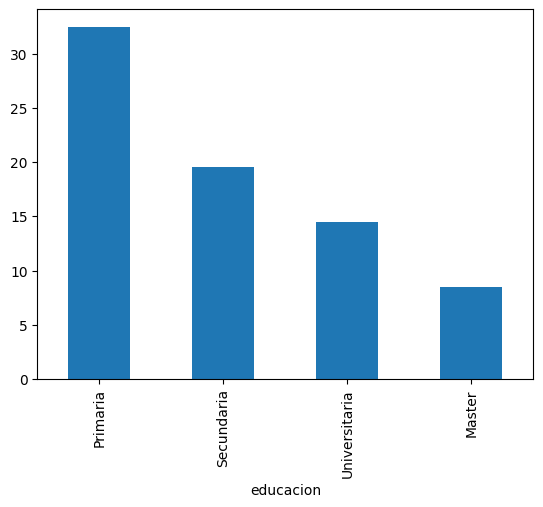

In [ ]:
#analisis por educación
temp=df.groupby('educacion').abandono.mean().sort_values(ascending=False)*100
temp.plot.bar()

<Axes: xlabel='estado_civil'>

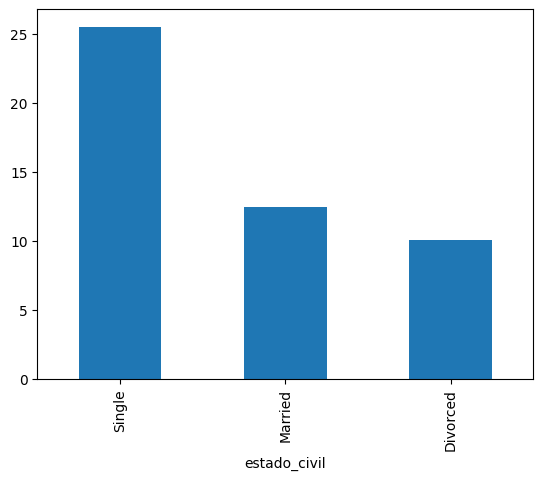

In [ ]:
#análisis por estado civil
temp_civil=df.groupby('estado_civil').abandono.mean().sort_values(ascending=False)*100
temp_civil.plot.bar()

<Axes: xlabel='horas_extra'>

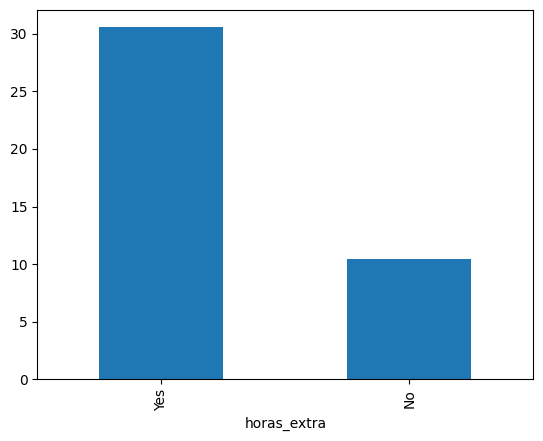

In [ ]:
#análisis por horas extras
temp_horas=df.groupby('horas_extra').abandono.mean().sort_values(ascending=False)*100
temp_horas.plot.bar()

<Axes: xlabel='puesto'>

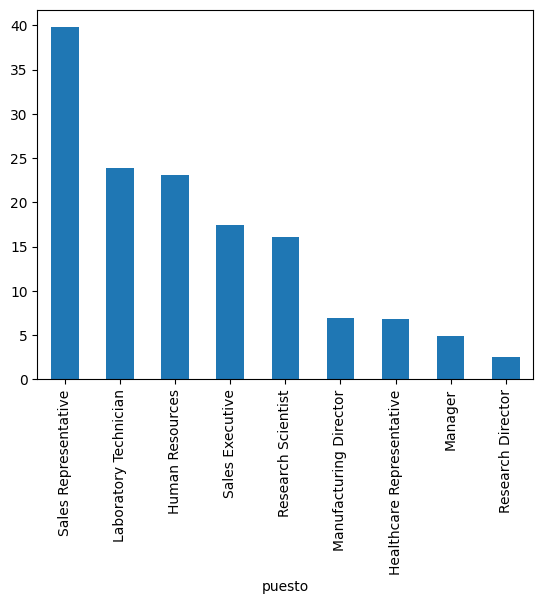

In [ ]:
temp_puesto=df.groupby('puesto').abandono.mean().sort_values(ascending=False)*100
temp_puesto.plot.bar()


<Axes: xlabel='abandono'>

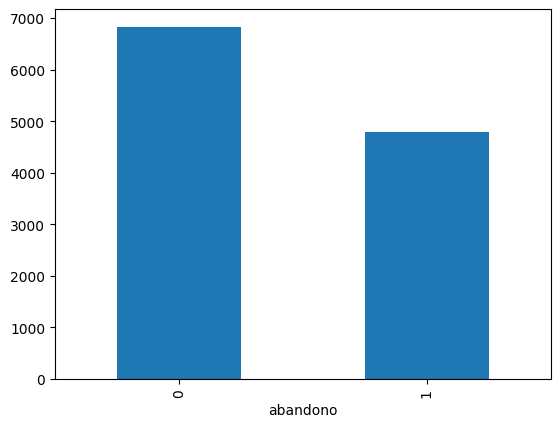

In [ ]:
#abandono-salario
temp_diferencia=df.groupby('abandono').salario_mes.mean()
temp_diferencia.plot.bar()

In [ ]:
#salario año
df['salario_año']=df.salario_mes.transform(lambda x: x*12)
df[['salario_año', 'salario_mes']]

,salario_año,salario_mes
id,,
1,71916,5993
2,61560,5130
4,25080,2090
5,34908,2909
7,41616,3468
...,...,...
2061,30852,2571
2062,119892,9991
2064,73704,6142


In [ ]:
#Calcular el impacto economico de cada empleado si deja el empledo
condiciones=[(df['salario_año']<30000),
             (df['salario_año']>=30000) & (df['salario_año']<50000),
             (df['salario_año']>=50000) & (df['salario_año']<75000),
             (df['salario_año']>=75000)
             ]
resultado=[df.salario_año*0.161,df.salario_año*0.197, df.salario_año*0.204, df.salario_año*0.21 ]
#aplicar condiciones
df['impacto__abandono']=np.select(condiciones, resultado, default=000)

df

,edad,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,abandono,salario_año,impacto__abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,Universitaria,2,...,80,0,8,0,6,0,5,1,71916,14670.864
2,49,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,Secundaria,2,...,80,1,10,3,10,1,7,0,61560,12558.240
4,37,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,Secundaria,1,...,80,0,7,3,0,0,0,1,25080,4037.880
5,33,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,Universitaria,1,...,80,0,8,3,8,3,0,0,34908,6876.876
7,27,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,Universitaria,1,...,80,1,6,3,2,2,2,0,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,Master,2,...,80,1,17,3,5,0,3,0,30852,6077.844
2062,39,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,Secundaria,3,...,80,1,9,5,7,1,7,0,119892,25177.320
2064,27,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,Master,2,...,80,1,6,0,6,0,3,0,73704,15035.616


In [ ]:
#cuanto ha costado el problema último año
costo_total=df.loc[df.abandono==1].impacto__abandono.sum()
print(f'El impacto que ha tenido la empresa el último año es: {costo_total} dolares')

El impacto que ha tenido la empresa el último año es: 2719005.912 dolares


Cuanto cuesta los empleados que no estan motivados? (implicacion== baja)



In [ ]:
df.loc[(df.abandono==1) & (df.implicacion=='Baja')].impacto__abandono.sum()

0.0

<ipython-input-61-f04be9ec25cf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['abandono'][:-1].sort_values().plot(kind='bar')


<Axes: >

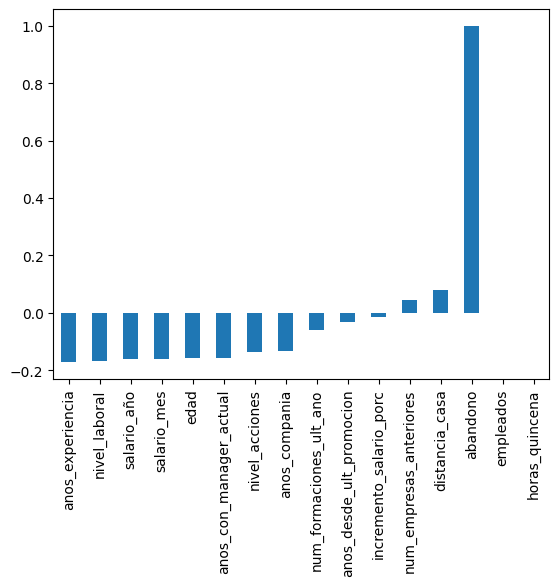

In [ ]:
#Plot correlation between the variables and Diabetes_binary
df.corr()['abandono'][:-1].sort_values().plot(kind='bar')

In [ ]:
import seaborn as sns
# Scatter plot:

sns.set()
cols = df.columns
sns.pairplot(df[cols], size = 2.5)
plt.show();

# EDA VARIABLES NUMERICAS

In [ ]:
def estadisticos_count(num):

  #calculamos describe en las columnas
  estadisticos=num.describe().T

  #añadir la mediana
  estadisticos['median']=num.median()

  estadisticos=estadisticos.iloc[:, [0,1,8,2,3,4,5,6,7]]

  return estadisticos


In [ ]:
estadisticos_count(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.000,9.135373,18.000,30.000,36.000,43.00,60.00
distancia_casa,1470.0,9.192517,7.000,8.106864,1.000,2.000,7.000,14.00,29.00
empleados,1470.0,1.000000,1.000,0.000000,1.000,1.000,1.000,1.00,1.00
nivel_laboral,1470.0,2.063946,2.000,1.106940,1.000,1.000,2.000,3.00,5.00
salario_mes,1470.0,6502.931293,4919.000,4707.956783,1009.000,2911.000,4919.000,8379.00,19999.00
num_empresas_anteriores,1470.0,2.693197,2.000,2.498009,0.000,1.000,2.000,4.00,9.00
incremento_salario_porc,1470.0,15.209524,14.000,3.659938,11.000,12.000,14.000,18.00,25.00
horas_quincena,1470.0,80.000000,80.000,0.000000,80.000,80.000,80.000,80.00,80.00
nivel_acciones,1470.0,0.793878,1.000,0.852077,0.000,0.000,1.000,1.00,3.00
anos_experiencia,1470.0,11.279592,10.000,7.780782,0.000,6.000,10.000,15.00,40.00


In [ ]:
df.isnull().sum()

edad                        0
viajes                      0
departamento                0
distancia_casa              0
educacion                   0
carrera                     0
empleados                   0
satisfaccion_entorno        0
implicacion                 0
nivel_laboral               0
puesto                      0
satisfaccion_trabajo        0
estado_civil                0
salario_mes                 0
num_empresas_anteriores     0
horas_extra                 0
incremento_salario_porc     0
evaluacion                  0
satisfaccion_companeros     0
horas_quincena              0
nivel_acciones              0
anos_experiencia            0
num_formaciones_ult_ano     0
anos_compania               0
anos_desde_ult_promocion    0
anos_con_manager_actual     0
abandono                    0
salario_año                 0
impacto__abandono           0
dtype: int64

# Preparación de los datos del modelo

Transformar todas las variables categoricas a numericas

In [ ]:
df_ml=df.copy()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   viajes                    1470 non-null   object 
 2   departamento              1470 non-null   object 
 3   distancia_casa            1470 non-null   int64  
 4   educacion                 1470 non-null   object 
 5   carrera                   1470 non-null   object 
 6   empleados                 1470 non-null   int64  
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empr

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#categoricas
cat=df_ml.select_dtypes('O')

#instancia
ohe=OneHotEncoder(sparse=False)

#entrenamos
ohe.fit(cat)

#aplicamos la transfomacion
cat_ohe=ohe.transform(cat)

#se evaluan las variables categoricas
cat_one=pd.DataFrame(cat_ohe, columns=ohe.get_feature_names_out(input_features=cat.columns)).reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
cat_one

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
num=df.select_dtypes('number').reset_index(drop=True)
num

,edad,distancia_casa,empleados,nivel_laboral,salario_mes,num_empresas_anteriores,incremento_salario_porc,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,abandono,salario_año,impacto__abandono
0,41,1,1,2,5993,8,11,80,0,8,0,6,0,5,1,71916,14670.864
1,49,8,1,2,5130,1,23,80,1,10,3,10,1,7,0,61560,12558.240
2,37,2,1,1,2090,6,15,80,0,7,3,0,0,0,1,25080,4037.880
3,33,3,1,1,2909,1,11,80,0,8,3,8,3,0,0,34908,6876.876
4,27,2,1,1,3468,9,12,80,1,6,3,2,2,2,0,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,1,2,2571,4,17,80,1,17,3,5,0,3,0,30852,6077.844
1466,39,6,1,3,9991,4,15,80,1,9,5,7,1,7,0,119892,25177.320
1467,27,4,1,2,6142,1,20,80,1,6,0,6,0,3,0,73704,15035.616
1468,49,2,1,2,5390,2,14,80,0,17,3,9,0,8,0,64680,13194.720


In [ ]:
df_ml=pd.concat([cat_one, num], axis=1)
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,abandono,salario_año,impacto__abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,80,0,8,0,6,0,5,1,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,80,1,10,3,10,1,7,0,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,80,0,7,3,0,0,0,1,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,80,0,8,3,8,3,0,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,80,1,6,3,2,2,2,0,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,80,1,17,3,5,0,3,0,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,80,1,9,5,7,1,7,0,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,80,1,6,0,6,0,3,0,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,80,0,17,3,9,0,8,0,64680,13194.720


In [ ]:
x=df_ml.drop(columns='abandono')
y=df_ml['abandono']

In [ ]:
#separación de entrenamiento y test

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y=train_test_split(x , y, test_size=0.3)

In [ ]:
train_X.isnull().sum()


viajes_Non-Travel                      0
viajes_Travel_Frequently               0
viajes_Travel_Rarely                   0
departamento_Human Resources           0
departamento_Research & Development    0
                                      ..
anos_compania                          0
anos_desde_ult_promocion               0
anos_con_manager_actual                0
salario_año                            0
impacto__abandono                      0
Length: 64, dtype: int64

In [ ]:
train_y

234     1
444     0
95      0
811     0
174     0
       ..
1138    0
367     0
757     0
144     0
959     0
Name: abandono, Length: 1029, dtype: int64

In [ ]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier

# Instantiate the DecisionTreeClassifier
ac = DecisionTreeClassifier(max_depth=4)

# Train the model
ac.fit(train_X, train_y)


DecisionTreeClassifier(max_depth=4)

In [ ]:
y_pred = ac.predict(test_X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,